In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


In [3]:
df.shape
df['HeartDisease'].value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
df['HeartDisease'].value_counts()

HeartDisease
0    274304
1     27261
Name: count, dtype: int64

## wizualizacja danych 

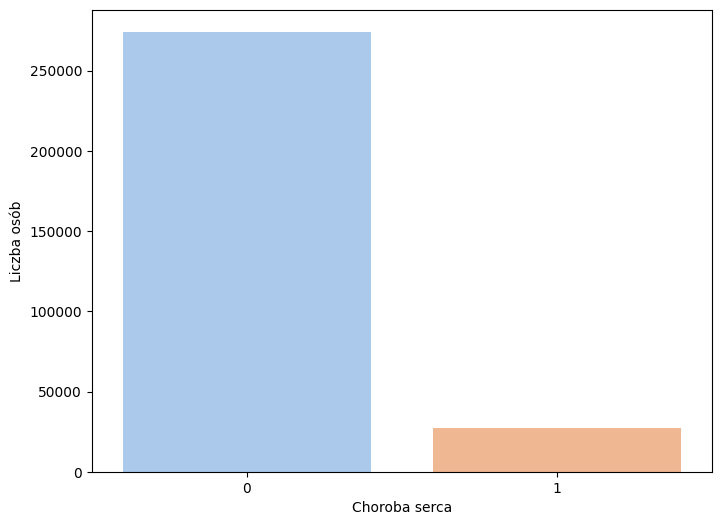

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df, palette='pastel')
plt.xlabel('Choroba serca')
plt.ylabel('Liczba osób')
plt.show()

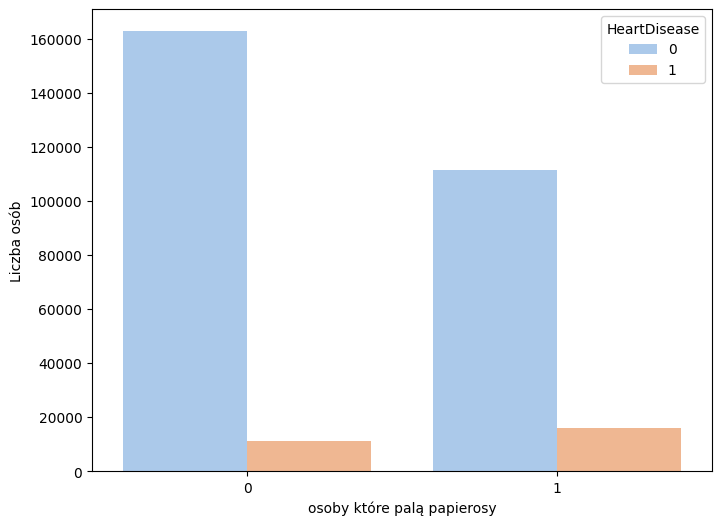

In [7]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Smoking", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które palą papierosy')
plt.ylabel('Liczba osób')
plt.show()

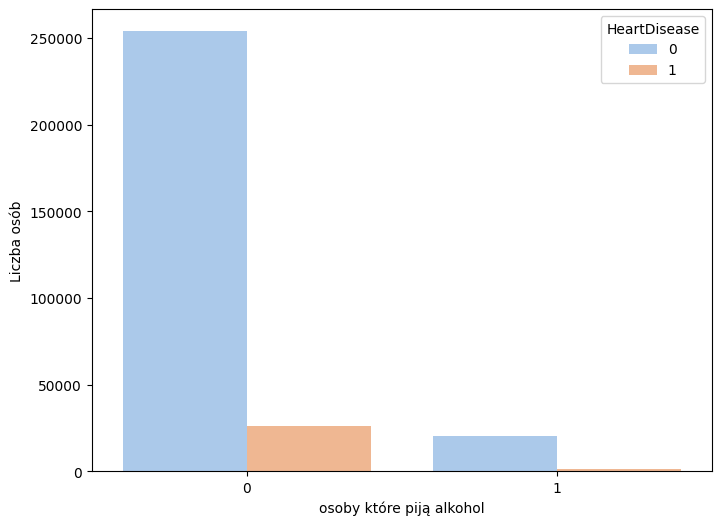

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x="AlcoholDrinking", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które piją alkohol')
plt.ylabel('Liczba osób')
plt.show()

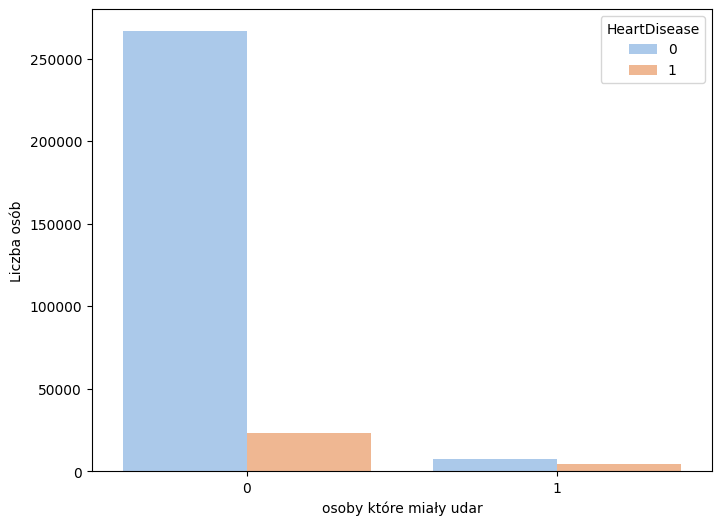

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Stroke", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które miały udar')
plt.ylabel('Liczba osób')
plt.show()

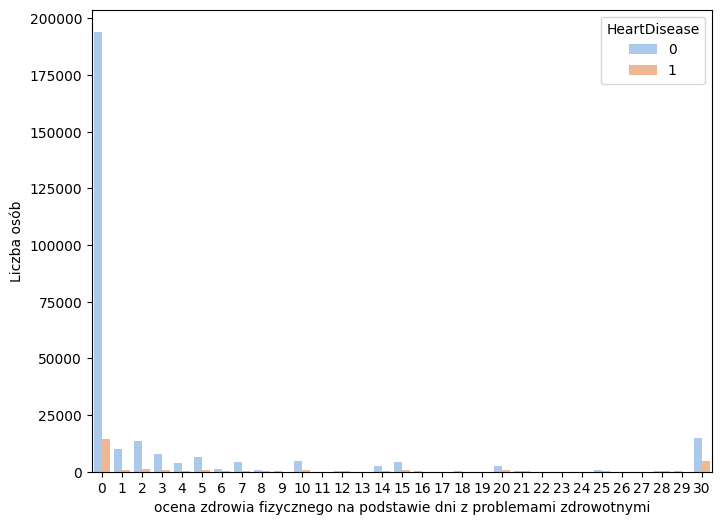

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x="PhysicalHealth", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('ocena zdrowia fizycznego na podstawie dni z problemami zdrowotnymi')
plt.ylabel('Liczba osób')
plt.show()

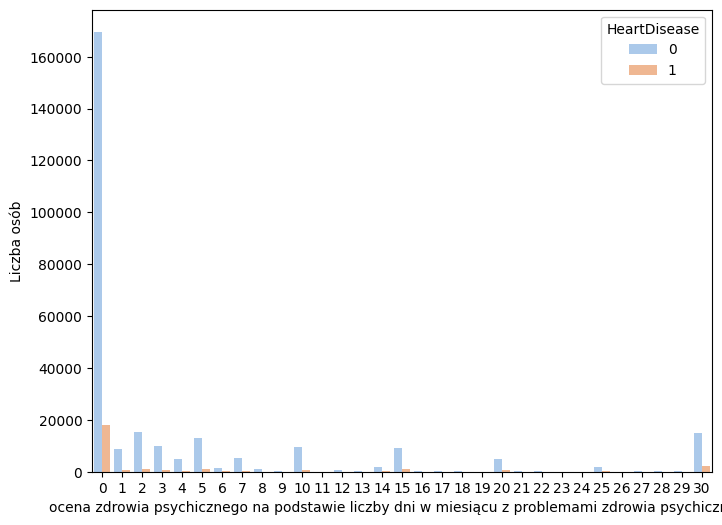

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="MentalHealth", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('ocena zdrowia psychicznego na podstawie liczby dni w miesiącu z problemami zdrowia psychicznego')
plt.ylabel('Liczba osób')
plt.show()

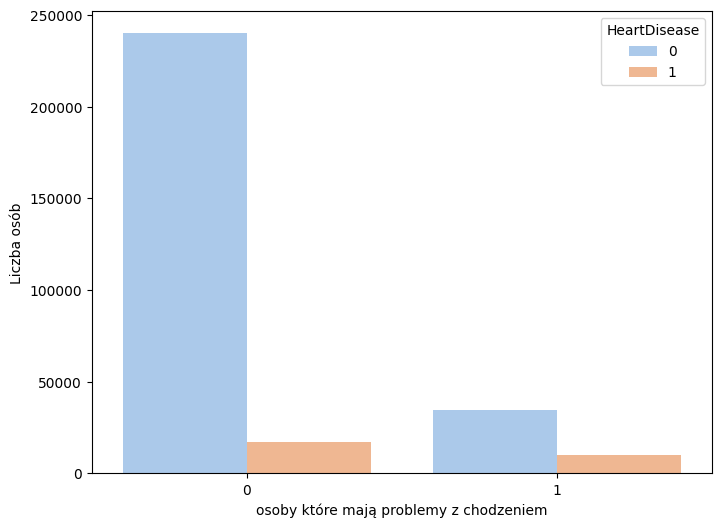

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x="DiffWalking", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które mają problemy z chodzeniem')
plt.ylabel('Liczba osób')
plt.show()

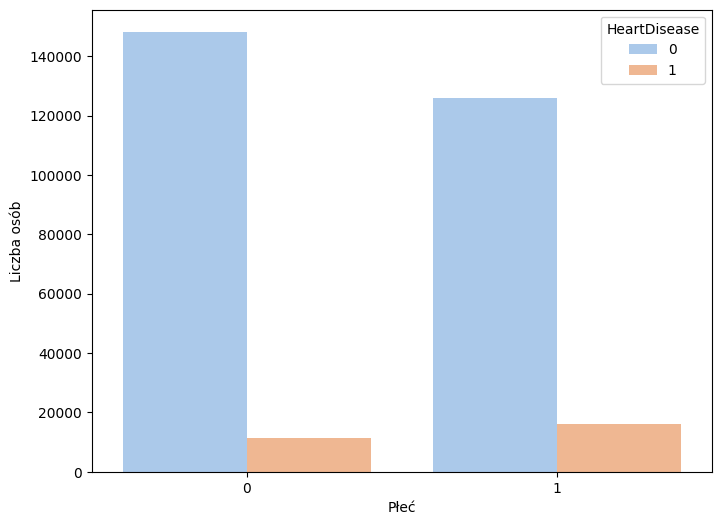

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.show()

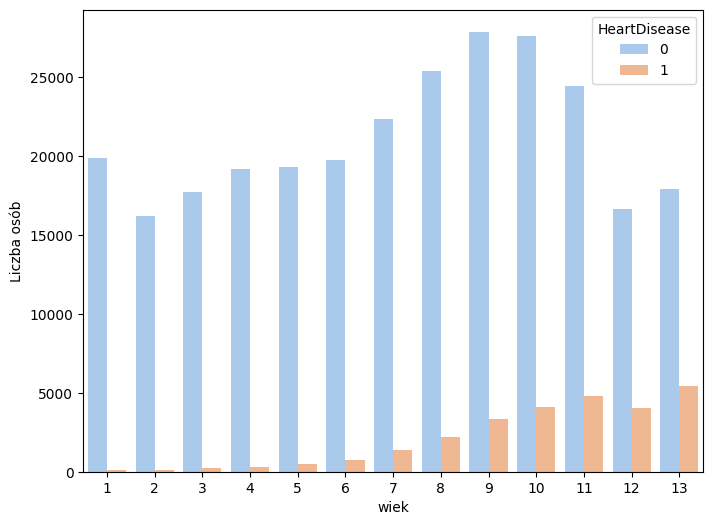

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="AgeCategory", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('wiek')
plt.ylabel('Liczba osób')
plt.show()

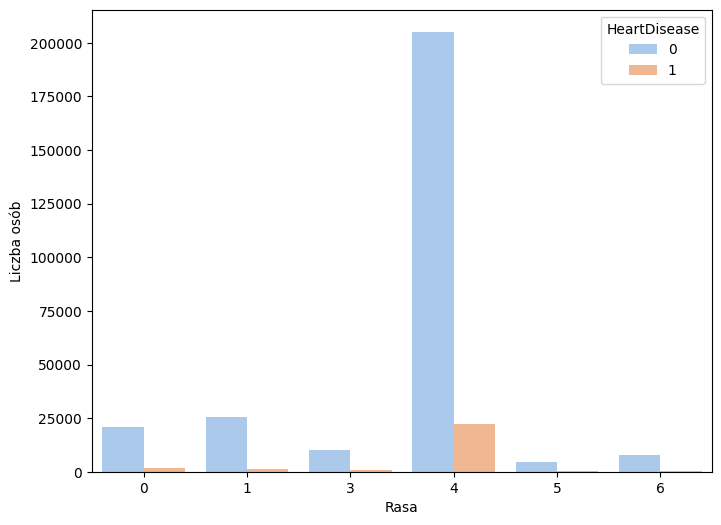

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Race", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('Rasa')
plt.ylabel('Liczba osób')
plt.show()

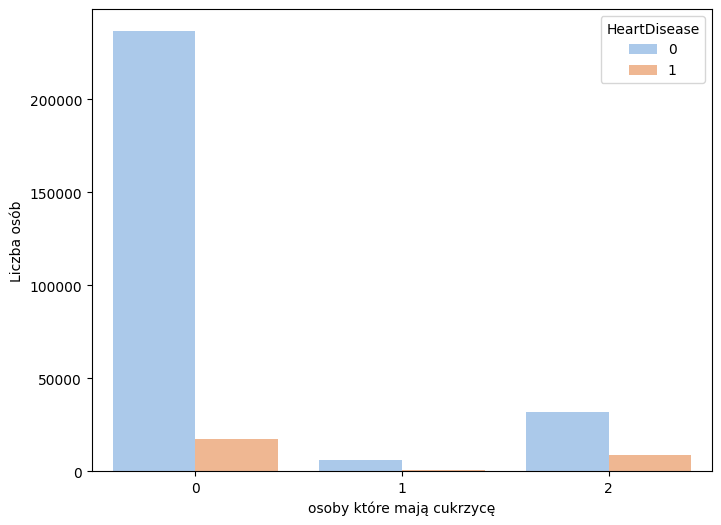

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Diabetic", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które mają cukrzycę')
plt.ylabel('Liczba osób')
plt.show()

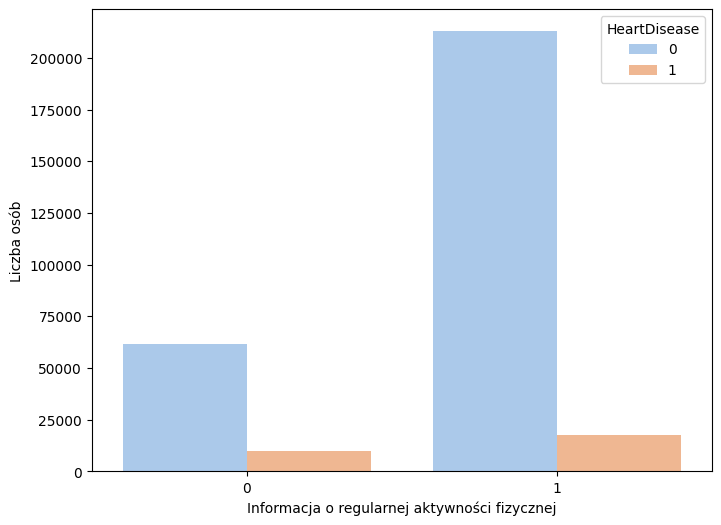

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x="PhysicalActivity", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('Informacja o regularnej aktywności fizycznej')
plt.ylabel('Liczba osób')
plt.show()

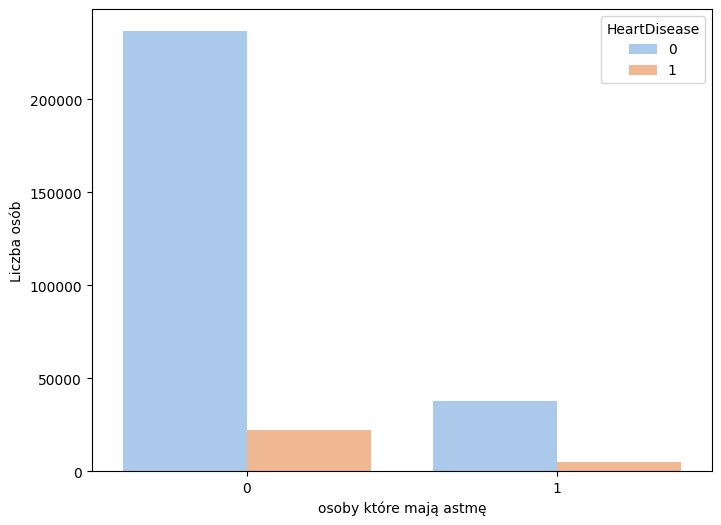

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Asthma", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które mają astmę')
plt.ylabel('Liczba osób')
plt.show()

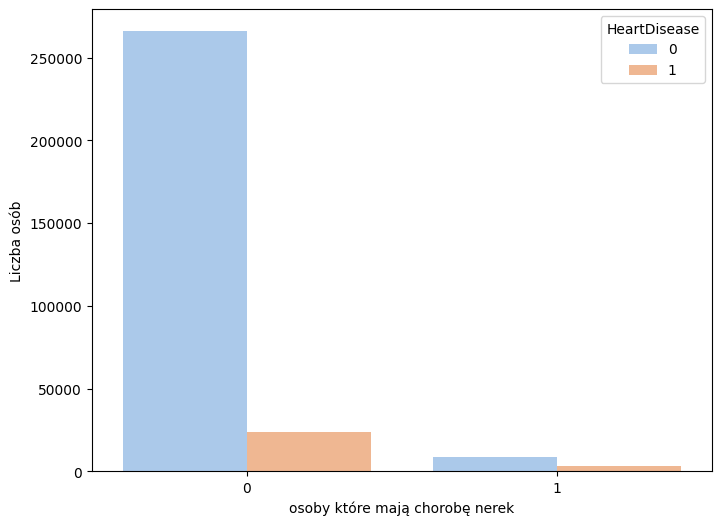

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x="KidneyDisease", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które mają chorobę nerek')
plt.ylabel('Liczba osób')
plt.show()

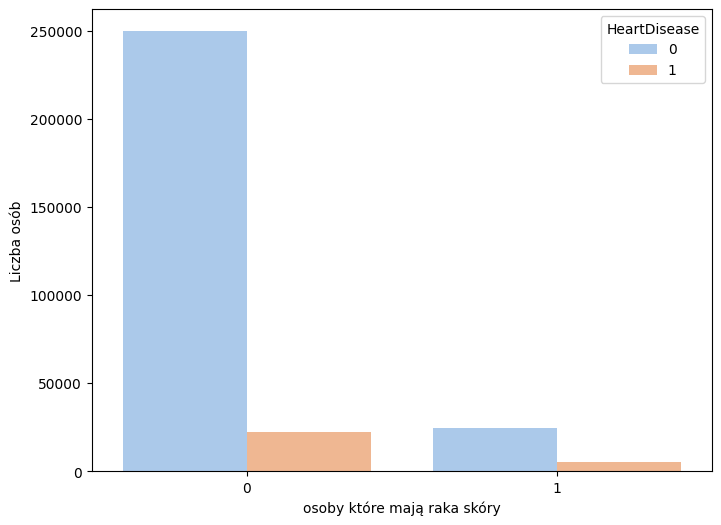

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x="SkinCancer", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('osoby które mają raka skóry')
plt.ylabel('Liczba osób')
plt.show()

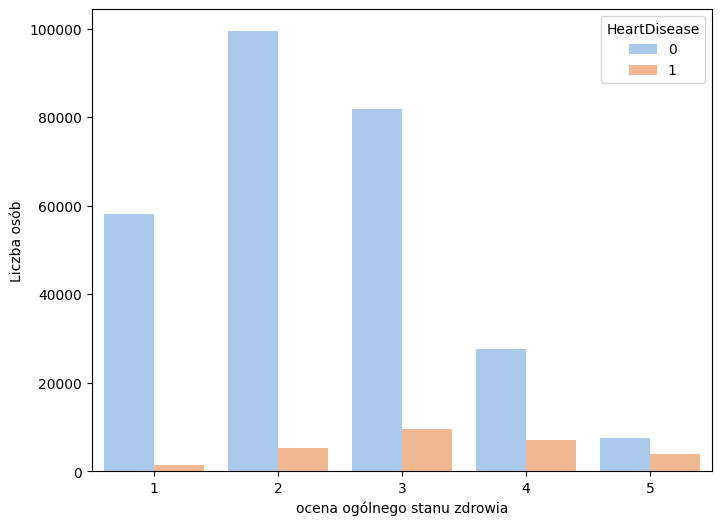

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x="GenHealth", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('ocena ogólnego stanu zdrowia')
plt.ylabel('Liczba osób')
plt.show()

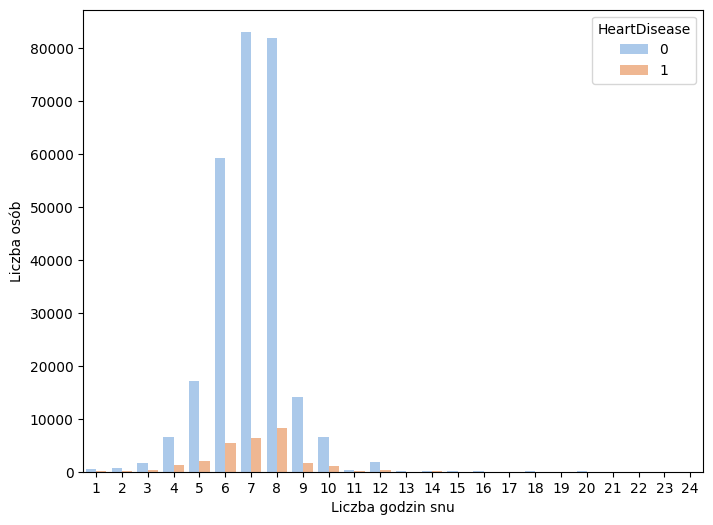

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x="SleepTime", data=df, hue="HeartDisease", palette="pastel")
plt.xlabel('Liczba godzin snu')
plt.ylabel('Liczba osób')
plt.show()

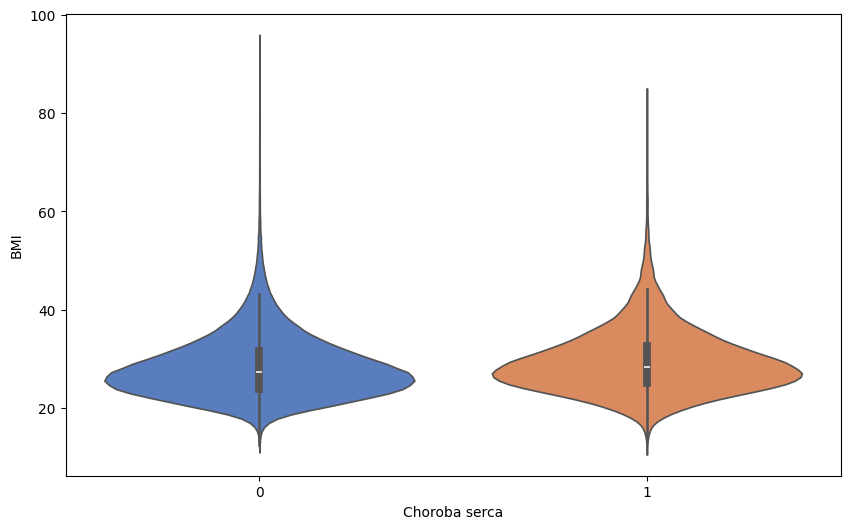

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HeartDisease', y='BMI', data=df, palette="muted")
plt.xlabel("Choroba serca")
plt.ylabel("BMI")
plt.show()

## naszą cechą celu jest HeartDiseaseorAttack

In [24]:
da2=df['HeartDisease'].value_counts().reset_index(name='count')
da2

,HeartDisease,count
0,0,274304
1,1,27261


## Korelacja

<Axes: >

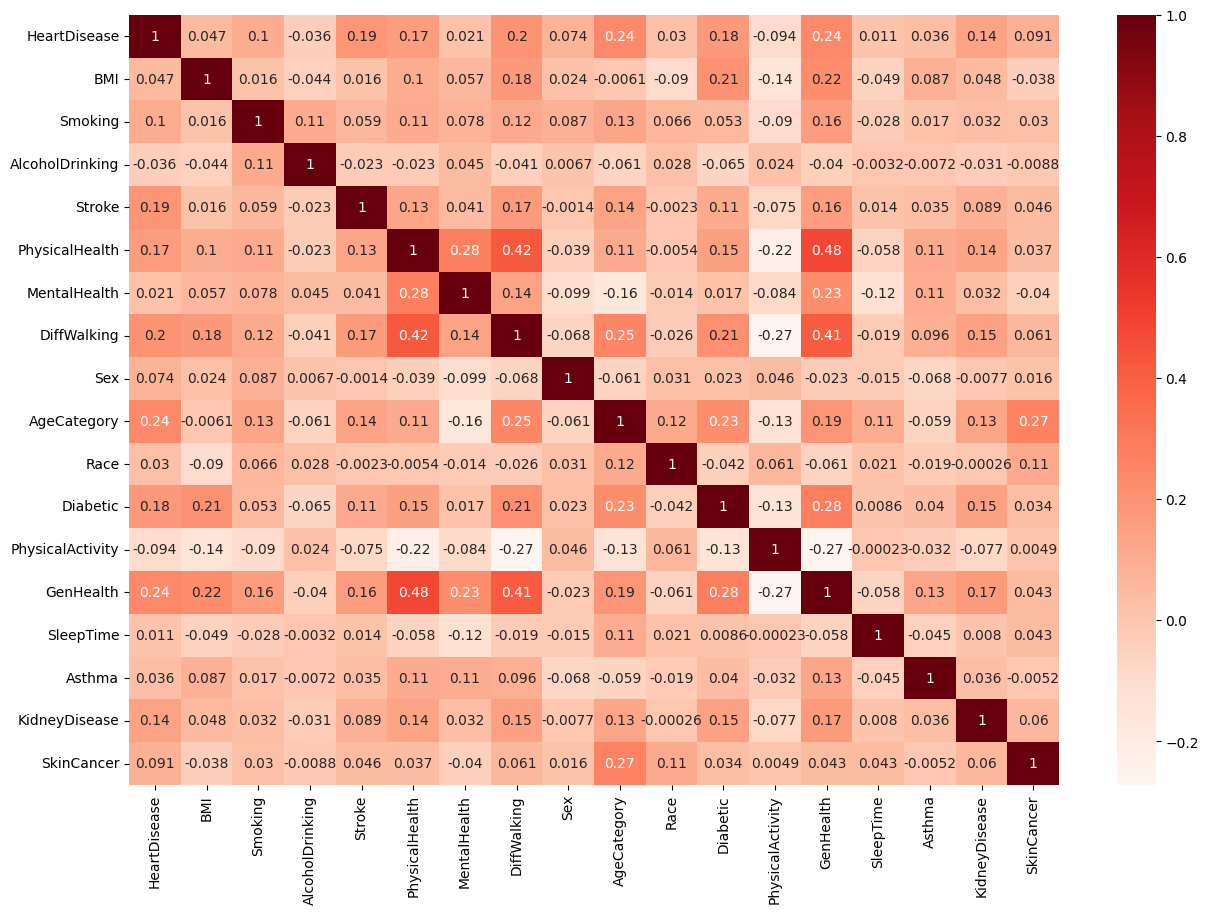

In [25]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,cmap='Reds')

## VIF- sprawdzenie istotności cech

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
#data32.drop(['Height',"Weight"],axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)

             feature        VIF
0       HeartDisease   1.271976
1                BMI  15.465726
2            Smoking   1.867237
3    AlcoholDrinking   1.103270
4             Stroke   1.120192
5     PhysicalHealth   1.765878
6       MentalHealth   1.475100
7        DiffWalking   1.668184
8                Sex   1.961434
9        AgeCategory   6.970509
10              Race   6.995422
11          Diabetic   1.374074
12  PhysicalActivity   4.298150
13         GenHealth   9.619893
14         SleepTime  16.040823
15            Asthma   1.212665
16     KidneyDisease   1.107013
17        SkinCancer   1.204758
